# **COMPLEX NETWORKS (2MBS80)**
## **MEASURING THE FRIENDSHIP PARADOX**
## **PROJECT 1**

### Harjot Kaur: 2038056, Emilia Nikolova: 1960636

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import mmread
import pandas as pd
import os
from pathlib import Path

####Declaration: USE OF AI
AI was used to verify grammar and to structure (visually) the core graphics of the assignment. No AI-generated content is used in this notebook.

The Jupyter Notebook and its relevant datasets are available also at https://github.com/em0608nik/severity_of_friendship_paradox

## **Problem 1.**
*Construct and implement an algorithm that can be used to build d-regular graphs. Make sure that the
description of the algorithm is explicit, and explain why it works.*

The following algorithm constructs a d-regular graph on n vertices given the integer values of n and d.
First of all, for such a graph to exist two conditions need to be satisfied and the algorithm accounts for that as well.
The first condition of existance is that the product n x d needs to be even. This follows from the handshaking lemma:
$$ \sum_{i=1}^{n} \deg(v_i) = n \times d = 2|E| $$
The second existance condition is that the maximum possible degree on a graph on n vertices is n - 1.
Therefore: $$ n \ge d + 1 $$
The algorithm then proceeds with the main logic. For a given degree d, it adds edges by connecting each vertex i to its neighbors at a certain "jump" distance k along the circle. It does this for all k from 1 up to d/2. This process adds two edges for each jump distance (k and -k), ensuring that each vertex has an even degree. If d is odd and n is even, a special case is needed because the jumps alone won't create an odd degree. In this scenario, the algorithm adds one more edge for each vertex by connecting it to the vertex located exactly opposite it in the cycle. This ensures every vertex achieves the target degree d in all the possible cases.

Source https://en.wikipedia.org/wiki/Regular_graph

In [ ]:
def d_regular_graph(n: int, d: int):
    """
    Constructs a d-regular graph with n vertices using the cyclic method.

    param n: number of vertices of the graph
    param d: degree of every vertex of the graph
    return: a NetworkX graph object
    """

    #Condition 1: The product of n and d must be even.
    if (n * d) % 2 != 0:
        raise ValueError(
            f"Cannot create a d-regular graph. The product of n and d "
            "must be an even number. Please provide valid parameters."
        )

    #Condition 2: The maximum possible degree for n vertices is n-1 (complete graph).
    if n < d + 1:
        raise ValueError(
            f"Cannot create a d-regular graph. The degree d must be less than n."
            " Please provide valid parameters."
        )

    #Initialize graph with n vertices.
    G = nx.Graph()
    G.add_nodes_from(range(n))

    #Case 1: Complete graph.
    if d == n - 1:
        G = nx.complete_graph(n)
        return G

    #Case 2: General d-regular graph using the cyclic method.
    for i in range(n):
        for k in range(1, (d // 2) + 1):
            #Connect vertex i to vertices at distance k (cyclic).
            neighbor1 = (i + k) % n
            neighbor2 = (i - k + n) % n

            G.add_edge(i, neighbor1)
            G.add_edge(i, neighbor2)

    #Special case: Odd degree d and even n.
    if d % 2 != 0:
        #Connect each vertex to the one directly opposite it in the cycle.
        for i in range(n):
            opposite = (i + n // 2) % n
            G.add_edge(i, opposite)

    return G

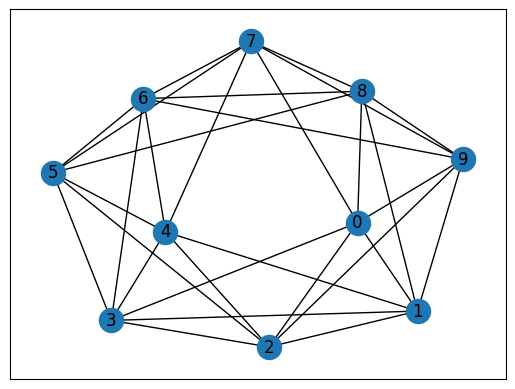

In [ ]:
example_graph = d_regular_graph(10,6)
nx.draw_networkx(example_graph)

## **Problem 2.**
*Choose two real-life networks on which you want to measure the severity of the Friendship paradox.
Explain for both networks what the friendship paradox would mean for this network.*

The first network selected for analysis, available at https://networkrepository.com/socfb-Harvard1.php, is a social friendship network derived from Facebook data concerning users from Harvard University. In this network, nodes represent individual users, and edges signify confirmed friendship ties.

This type of social network is a classic and highly relevant example for demonstrating the friendship paradox. The paradox states that, on average, a person's friends have more friends than the person does. In terms of graph theory applied to this dataset: a randomly chosen friend (via a random edge) has a higher degree (more friends) than a randomly chosen vertex (user).


The second network chosen (https://networkrepository.com/bio-dmela.php) is a protein-protein interaction network from Drosophila melanogaster (fruit fly). Here, nodes represent proteins, and edges indicate a physical or functional interaction between them.

The concept of the friendship paradox can be generalized to this network's structure. It suggests that a randomly selected protein (a typical protein in the network) will, on average, interact with partners that are more highly connected than the protein itself. Stated differently: proteins connected to a randomly chosen protein tend to have a higher number of interaction partners than the protein itself does. This highlights that, within biological interaction networks, highly connected "hub" proteins are more likely to be connected to other proteins.

## **Problem 3.**
*Design three metrics to measure the severity of the friendship paradox. Explain why the metrics make
sense and comment on relevant differences between the metrics.*

We need three elaborate ways to measure the **severity of the friendship paradox**. We consider the severity of the friendship paradox to be how strongly the paradox is expressed within the network. Intuitively, this translates to evaluating how much more "popular" a node is than its neighbours, what portion of the network is affected by the paradox, and if this phenomenon is consistent throughout the entirety of the network.

Before constructing appropriate metrics, accurately pointing out the behaviour we are interested in, a good reminder is the definition of the friendship paradox, i.e. the notion that "target vertex of a random friendship has on average higher degree than the average degree of the network", or formally expressed, for any fixed $G=([n], E)$ we have: $$\bar{d_n^*} ≥\bar{d_n}$$

with $\bar{d_n^*}$ being the average degree of a random friend and $\bar{d_n}$ describing the average degree in the network.
Additionally, we note that since the graph is deterministic, $d_n$ is deterministic as well.


###Paradox Strength (Metric 1)
We first focus on the most straighforward notion of quantifying the magnitude of the "friendship gap" for a random vertex. For that, we examine *Theorem 3.3*   in the lecture notes and its proof. We know that the average degree of a randomly chosen friend $v$ (target of a friendship) is:
\begin{align}
 \bar{d_n^*} =\frac{∑_{j=1}^nd_j^2}{∑_{v=1}^nd_v}= \frac{𝚬[D_n^2]}{𝐄[D_n]}
\end{align}

Furthermore, we can re-write $\bar{d_n}$ as follows:
$$ \bar{d_n} =\frac{\sum_{v=1}^{n} d_v}{n} = \mathbb{E}[D_n] $$

We can use these expression to re-write the friendship paradox in a manner that suits our goal better:
$$\bar{d_n^*} ≥\bar{d_n}, \quad \frac{\mathbb{E}[D_n^2]}{\mathbb{E}[D_n]} \ge \mathbb{E}[D_n], \quad \mathbb{E}[D_n^2] - (\mathbb{E}[D_n])^2 =  \operatorname{Var}(D_n) \ge 0. $$

This expression percisely captures the notion of the variance of a discrete random variable, which is what we want to investigate with **Metric 1**. We define the *paradox strength* (globally) in the network as the difference of the average degree of the target of a random friendship and the average degree of the network. Informally speaking, this shows how much more are your friends popular than you, on average. Thus, we define **Metric 1** as follows:
\begin{align}
  M_1=\frac{\bar{d_n^*}-\bar{d_n}}{\bar{d_n}}=\frac{𝚬[D_n^2]}{(𝐄[D_n])^2}-1
\end{align}
In addition to only relying on the difference to quantify the "friendship gap" of the network, the normalization of the expression introduces relativity to the result, which will allow us to compare the friendship paradox in different, unrelated networks.

We will interpret the metric rather intuitively, based on our knowledge of the paradox:


*   by definition of friendship paradox, no paradox occurs if the degrees of the vertices are all equal. Consequently, in this case, $M_1=0$, indicating that there is no paradox occuring in the observed network.
*   alternatively, if $M_1 >0$, it is indicative of the paradox present in the network, and the more the average degree of the target of a random friendship grows, i.e. the more popular a vertex  is, the larger $M_1$ becomes. So **larger values for $M_1$ indicate greater severity**.

In [ ]:
def paradox_strength(G):
  """
    Calculate the Paradox Strength (M1) of a network.

    param G: networkx.Graph, the input graph
    return: float, the M1
    """

  # Get the degrees of all the vertices in the graph
  degrees = np.array([d for _, d in G.degree()])

  # Handle empty graph edge case, since working with real-life graphs
  if len(degrees) == 0:
     raise ValueError(
            f"Graph is empty."
      )

  # Calculate average degree of a random vertex
  d_node = np.mean(degrees)

  # Calculate average degree of a random friend
  d_friend = np.mean(degrees**2) / d_node

  # Calculate relative difference
  M1= (d_friend - d_node) / d_node

  return M1

###Fraction of "Losers" (Metric  2)
Next, we focus on finding out how many of the vertices of the network are affected by the paradox. Since when we are studying networks, we do so with application to real-life networks in mind, it would be useful to know how many individuals "suffer" under the friendship paradox, i.e. how many people in the network are "losers" in the paradox. Thus, we design **Metric 2** with such a question taken into account. Additionally, **Metric 2** addresses a weakness of $M_1$ - the fact that $M_1$ looks at the global view of the network and could be high even if only a small, condensed group of vertices experience the paradox strongly, altering the average for the rest of the population. Such intricacies of the network's structure are lost if we only rely on $M_1$ and **Metric 2** aims to fill those blanks.

To reach the result we want, we use a straightforward tactic, i.e. calculate the proportion of nodes experiencing the paradox (or abiding by the definition of the paradox). We call these unpopular nodes "losers". We recall *Theorem 3.1*, stating that the neighbours of a random vertex have a larger average degree than the vertex itself, or the degrees are all equal. Thus, we can use this intuitive rule to filter how many of the vertices in the network experience this phenomenon.

We take a $v ∈ [n]$ of the graph $G=([n],E)$ and calculate the average degree of its neighbours:
\begin{align}
 \bar{d_v}=\frac{1}{d_v}∑_{w:\{v,w\}∈E}d_w
\end{align}
Then, we compare $\bar{d_v}>d_v$ for each of $v ∈ [n]$, and the final metric can be expressed as follows:
\begin{align}
M_2=\frac{\text{Number of vertices with } \bar{d_v}>d_v}{n}
\end{align}

Since this metric measures how widespread the paradox is throughout the network, thus a severe paradox would affect a large part of the network. Then, we may interpret the result like so:


*   we may take $M_2=0.5$  as a baseline, as in "Why Your Friends Have More Friends Than You Do" Scott L. Felt states that roughly half the nodes experience the paradox.
*   then, intuitively, if $M_2>0.5$, we consider a severe case of the friendship paradox within the network, since from an individual's perspective, a majority of individuals feel less connected than their friends.
* even more so, if $M_2\approx1$, the paradox is extreme, affecting almost everyone.
* alternatively, if $M_2<0.5$ the paradox is mild.

Source: https://pdodds.w3.uvm.edu/teaching/courses/2009-08UVM-300/docs/others/everything/feld1991a.pdf


In [ ]:
def fraction_losers(G):
  """
    Calculate the fraction of losers (M2) of a network.

    param G: networkx.Graph, the input graph
    return: float, the M2 value between 0 and 1
  """

  if len(G) == 0:
    raise ValueError(
            f"Graph is empty."
    )

  # Counter
  paradox_count = 0;

  for node in G.nodes():
    neighbors = list(G.neighbors(node))
    d_i = G.degree(node)

    #skip isolated nodes since they have no friends for comparisson
    if d_i == 0:
      continue

    # Calculate average degree of neighbors
    neighbor_degree = [G.degree(n) for n in neighbors]
    d_neighbor = np.mean(neighbor_degree)

    # Chehck: does the vertex experience the paradox
    if d_i < d_neighbor:
      paradox_count += 1

 # calculate fraction of losers experiencing the paradox
 # from nodes that **can** exprience it, excluding the isolated nodes
  nodes_with_neighbors = sum(1 for node in G.nodes() if G.degree(node) > 0)

  if nodes_with_neighbors ==0:
    raise ValueError(
            f"Graph has no nodes with neighbors."
    )

  M2 = paradox_count / nodes_with_neighbors

  return M2

###Mean Relative Difference (Metric 3)
Naturally, after designing $M_2$, the question of how much actually does the paradox affect the vertices that *do* experience it. This, however, is not captured with $M_2$, as it does not represent the magnitude of "shock" vertices receive - a node whose friends have one more friend on average counts the same as a node whose friends have 100 more friends. Thus, we design the last metric with finding a way to quantify that magnitude in mind.

Firstly, we need to calculate the discrepancy for each of the affected node, i.e. the $v∈[n]$ with $\bar{d_v}>d_n$. So, we introduce $δ_v$ to be the relative discrepancy of $v$ with:
\begin{align}
δ_v=\frac{\bar{d_v}-d_v}{d_v}
\end{align}
$δ_v$ measures "how much more popular" the friends are relative to the node itself. Notably, we have divided by $d_v$, which normalizes the result and makes it relative to all the nodes in the network, despite the different degrees.

Then, the mean relative difference across the entire network is expressed by:
\begin{align}
M_3=\frac{1}{n}∑_{v=1}^n δ_v
\end{align}
We note here that we are averaging over $|[n]|$ and not the entire network, since it provides more stability to the result, as its more robust to outliers.

We shall interpret the results of $M_3$ in a similar manner to $M_2$:


*   $M_3=0.1$ means that, on average, the "losers" have friends with 10% more friends than they do.
*   in general, a high $M_3$ indicates that the network a few extremes, which creates a large preceived disparity.



$M_3$ is a complement to $M_2$, since a network can have a mild effect but with many "losers", or, conversely, fewer "losers" but a strong individual "shock" on the nodes.


In [ ]:
def mean_relative_difference(G):
  """
    Calculate the Mean Relative Difference (M3) of a network.

    M3 measures the average relative difference between a node's degree
    and the average degree of its neighbors, across the network.

    param G: networkx.Graph, the input graph
    return: float, the M3 value
    """

  if len(G) == 0:
    raise ValueError(
            f"Graph is empty."
    )

  relative_differencies = []
  #total_nodes= len(G)

  for node in G.nodes():
    d_i = G.degree(node)

    # DONT skip isolated nodes
    if d_i == 0:
      relative_differencies.append(0.0)
      continue

    # Calculate average degree of neighbors
    neighbors = list(G.neighbors(node))
    neighbor_degree = [G.degree(n) for n in neighbors]
    d_neighbor = np.mean(neighbor_degree)

    # Calculate relative difference only if the paradox is experiences

    if d_i < d_neighbor:
      diff = (d_neighbor - d_i) / d_i
      relative_differencies.append(diff)
    else:
      relative_differencies.append(0.0)
      pass

  # no node experiences the paradox
  if len(relative_differencies) == 0:
    raise ValueError(
            f"Graph does not experience the friendship paradox."
    )
  # Calculate mean relative difference
  M3 = np.mean(relative_differencies)

  return M3

## **Problem 4.**
*Test your metrics on the Erd˝os-Rényi model (with sparse scaling), the d-regular graph and the two real-life
networks you have chosen. Do the metrics perform as expected? If so, how can we see in performs well? If not, can
you formulate a hypothesis why the metrics do not perform as expected? Use your findings to identify one friendship
paradox metric as the “best”*

In [ ]:
def load_mtx_graph(filepath):
    """Load graph from .mtx file"""
    try:
        matrix = mmread(filepath)
        G = nx.from_scipy_sparse_array(matrix)
        return G
    except Exception as e:
        print(f"Error loading {filepath}: {e}")
        return None

def calculate_metrics_for_graph(G, name):
    """Calculate all metrics for a single graph"""
    if G is None:
        return

    n = len(G)
    m = G.number_of_edges()
    avg_degree = 2 * m / n if n > 0 else 0

    m1 = paradox_strength(G)
    m2 = fraction_losers(G)
    m3 = mean_relative_difference(G)

    print(f"\n{name}:")
    print(f"  Nodes: {n}")
    print(f"  Edges: {m}")
    print(f"  Average Degree: {avg_degree:.2f}")
    print(f"  M1 (PS): {m1:.4f}")
    print(f"  M2 (FoS): {m2:.4f}")
    print(f"  M3 (MRD): {m3:.4f}")


# ER graph generation
N = 5000  # Number of nodes
k_avg = 6 # Target average degree
P_er = k_avg / N  # Probability for sparse scaling
G_er = nx.gnp_random_graph(n=N, p=P_er, seed=42)

# Main execution
print("Friendship Paradox Metrics")
print("=" * 50)

# Analyze example_graph from above
if 'example_graph' in globals():
   calculate_metrics_for_graph(example_graph, "Example Graph")
else:
    print("\nExample Graph: Not found in current environment")

# Analyze ER graph
print("\nSynthetic ER Network:")
print("-" * 30)
calculate_metrics_for_graph(G_er, f"Erdős–Rényi ($N={N}, p={P_er:.5f}$)")

# Analyze real-life networks
print("\nReal-life Networks:")
print("-" * 30)

# Load and analyze protein-protein
bio_dmela = load_mtx_graph("bio-dmela.mtx")
if bio_dmela is not None:
    calculate_metrics_for_graph(bio_dmela, "Bio-DMELA")
else:
    print("Bio-DMELA: Could not load")

# Load and analyze Facebook
harvard_fb = load_mtx_graph("socfb-Harvard1.mtx")
if harvard_fb is not None:
    calculate_metrics_for_graph(harvard_fb, "Harvard Facebook")
else:
    print("Harvard Facebook: Could not load")

print("\n" + "=" * 50)

Friendship Paradox Metrics

Example Graph:
  Nodes: 10
  Edges: 30
  Average Degree: 6.00
  M1 (PS): 0.0000
  M2 (FoS): 0.0000
  M3 (MRD): 0.0000

Synthetic ER Network:
------------------------------

Erdős–Rényi ($N=5000, p=0.00120$):
  Nodes: 5000
  Edges: 14732
  Average Degree: 5.89
  M1 (PS): 0.1645
  M2 (FoS): 0.6431
  M3 (MRD): 0.5211

Real-life Networks:
------------------------------

Bio-DMELA:
  Nodes: 7393
  Edges: 25569
  Average Degree: 6.92
  M1 (PS): 2.4294
  M2 (FoS): 0.9082
  M3 (MRD): 10.4343

Harvard Facebook:
  Nodes: 15126
  Edges: 824617
  Average Degree: 109.03
  M1 (PS): 1.0471
  M2 (FoS): 0.8573
  M3 (MRD): 10.5308



Looking at the results above, we see that the metrics perfom mostly as expected. $M_1$ and $M_2$ give values that we predicted in **Problem 3**. In the d-regular graph (Example graph), both the metrics give 0, which is expected, as the equal degrees of all the nodes eliminates the paradox, as per the definition. In the real-world networks for the protein and Facebook connections, both metrics confirm the presence of a paradox, where $M_2$ shows $≈90\%$ of the nodes are "losers", which is reasonable for heavy-tailed social networks. Additionally, the ER graph shows, based on the expected results, that the friendship paradox is not as severe there.

$M_3$, while correctly displaying 0 for the d-regular graph, showed a surprising value for us - it showed that in both networks, on average people have friends that have 10 times more friends than them. We expected $M_3≈2$ for a general network.

Our hypothesis for $M_3$'s poor (and rather disappointing, as we were excited about that one) performance is that its value is extremely sensitive to outliers and the heavy-tailed degree distribution that is commonly seen in real life networks. When we thought about it, the value is actually very understandable. A reason for such a blow-up is that the relative difference has the node's own degree in the denominator. An example of how the metric can be easily inflated is the discrepancy between a node with a degree 100 and a node with a degree 1, which gives
\begin{align}
 \frac{100-1}{1}=99
\end{align}
Thus, since the result blows up due to outliers, it does not reflect the experience of the median user, which means it does not give useful insight in the overall severity of the friendship paradox, which we want to measure. That is why we did not choose it as the "best".

When selecting between $M_2$ and $M_1$, we considered this: while both perform as expected, $M_1=2.4, M_1=1$ are very different results and are difficult to interpret when pitted against each other, and offer no meaningful intiutive difference between the two networks.

**In the end, $M_2$, the Fraction of "Losers", presents the most robustness, as it is essentially unaffected by outliers, since it is just a proportion, and offers clearer interpretability.**

## **Problem 5.**
*Apart from the two networks you chose in Problem 2, choose additional real-life networks online until
you have ten. For these ten networks, compute both your friendship paradox metric and a degree-degree correlation
coefficient. Plot the outcomes against each other in a scatter plot. To what extend to you feel degree-degree correlations
explain the success of your chosen friendship paradox metric?*

We chose the following 8 networks to test our $M_2$:

**Network 3**: https://networkrepository.com/socfb-Auburn71.php \
**Network 4**: https://networkrepository.com/socfb-Baylor93.php \
Network 3 and 4 are social friendship networks extracted from Facebook consisting of people (nodes) with edges representing friendship ties within Auburn Univeristy of Alabama and Baylor Univeristy of Texas, respectively.\
**Network 5**: https://networkrepository.com/bn-mouse-kasthuri-graph-v4.php \
Network 5 is a brain network representing a mouse's brain, where edges represent fiber tracts (axons in the brain) that connect one vertex to another.\
**Network 6**: https://networkrepository.com/bio-WormNet-v3.php \
Network 6 is a biological network, representing gene functional associations with the gene as the nodes and the associations as the edges, with the intention of research into predicting RNAi phenotypes. \
**Network 7**: https://networkrepository.com/bio-yeast.php\
Network 7 is a biological network, representing the protein connection in yeast.\
**Network 8**: https://networkrepository.com/soc-hamsterster.php \
Network 8 is of the friendships and family links between users of the website http://www.hamsterster.com. \
**Network 9**: https://networkrepository.com/BA-2-24-60-L2.php \
**Network 10**: https://networkrepository.com/soc-epinions.php \
Network 10 is a social network, capturing trust between users.

We strived to choose networks from different domains - not only social networks, but brain, biological and social media networks (retweet). When choosing the networks, we focused mainly on sparsity, size of the network (so that the extraction time would not be too long), and minimum & maximum node degree.

Before we apply $M_2$ to the selected networks, we first shortly introduce the notion of the degree-degree correlation coefficient and what it represents.

The degree correlation coefficient $r$ is a measure that is used in network science to assess the assortativity of a graph, meaning it quantifies the likelihood that vertices (for example people, computers, proteins) will be connected to other nodes with a similar nymber of link, i.e. with a similar degree. The coefficient is in the between -1 and 1. A positive value indicates *assortative mixing*, which means high-degree nodes connect to other high-degree nodes (prevalent in social networks). Whereas, a negative value indicates disassortative mixing, where high-degree nodes tend to connect to low-degree nodes. A value nearing zero suggests no strong correlation.

Simply put, the degree-degree metric shows if "the rich" in a network prefer to associate with "the rich", the "poor", or randomly.

We are looking for a relationship between the degree-degree correlation and our $M_2$. Intuitively, if we look at the network from the perspective of a single node with a low degree, a "loser", then in a disassortative network with $r<0$ it is very likely that the few connections for the "loser" will be popular hubss. Since a hub has a high degree, it blows up $\bar{d_v}$, the average friend's degree of the "loser" $v ∈ [n]$, which facilitates $\bar{d_v}>d_v$. Thus, $M_2$ will also be high. The opposite is logical as well - in assortative networks with $r>0$, where high-degree nodes "stick together", $\bar{d_v}$ will not be as skewed, thus a smaller fraction of the network (lower $M_2$) will be affected. But this is just a speculation, and the analysis below will either confirm or deny this hypothesis.

Since $\texttt{Networkx}$ library includes a direct function that computes the coefficient, we will not include the formula for it here.

FRIENDSHIP PARADOX vs DEGREE ASSORTATIVITY ANALYSIS
Reading BA-2_24_60-L2.edges...
  Yay BA-2: 10693 nodes, 639750 edges
Reading bio-WormNet-v3.edges...
  Yay Gene funcs: 16347 nodes, 762822 edges
Reading bn-mouse-kasthuri_graph_v4.edges...
  Yay Mouse brain axons: 1029 nodes, 1559 edges
Reading soc-epinions.mtx...
  Yay Eopinions: 26588 nodes, 100120 edges
Reading socfb-Auburn71.mtx...
  Yay Auburn FB: 18448 nodes, 973918 edges
Reading socfb-Baylor93.mtx...
  Yay Baylor FB: 12803 nodes, 679817 edges
Reading bio-dmela.mtx...
  Yay Fly proteins: 7393 nodes, 25569 edges
Reading socfb-Harvard1.mtx...
  Yay Harvard FB: 15126 nodes, 824617 edges
Reading bio-yeast.mtx...
  Yay Yeast protein: 1458 nodes, 1948 edges
Reading soc-hamsterster.edges...
  Yay Hamsterster: 2429 nodes, 16632 edges

Successfully analyzed 10 networks:
  BA-2: 10693 nodes, M2=0.986, assortativity=-0.600
  Gene funcs: 16259 nodes, M2=0.907, assortativity=0.322
  Mouse brain axons: 987 nodes, M2=0.880, assortativity=-0.24

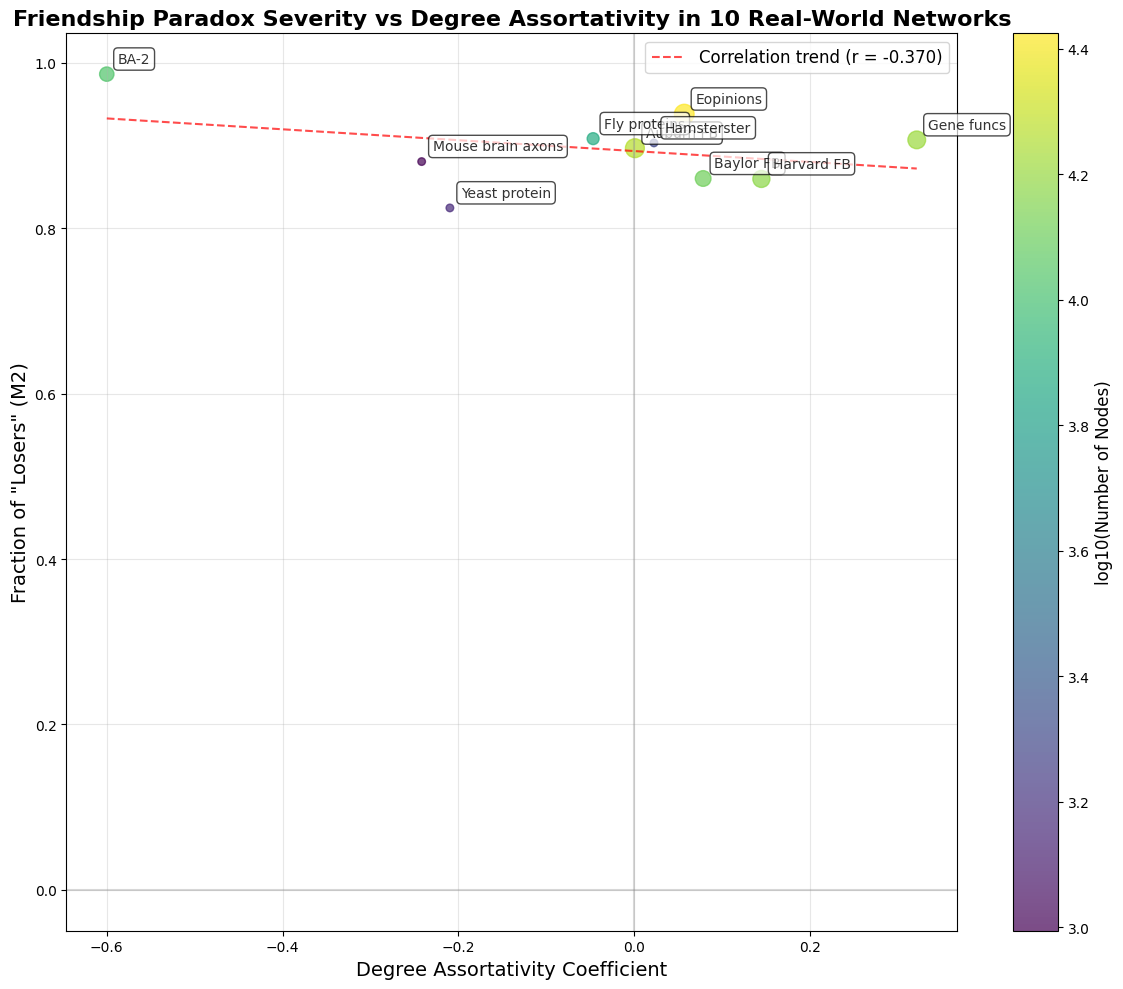


Correlation between M2 and Assortativity: -0.370

SUMMARY STATISTICS:
Average M2: 0.896
Average assortativity: -0.047
Network sizes: 987 to 26588 nodes


In [ ]:
def degree_assortativity(G):
    """Calculate degree-degree correlation coefficient using Networkx

    param G: networkx.Graph, the input graph
    return: float, the degree-degree correlation coefficient
    """
    try:
        return nx.degree_assortativity_coefficient(G)
    except:
        return 0.0

# Multi-format graph reader since we have both .mtx and .edges files
def read_network_file(file_path):
    """Read network from various file formats

    param: file_path: str, path to the file
    return: networkx.Graph, the graph
    """
    file_path = Path(file_path)
    if not file_path.exists():
        return None

    file_ext = file_path.suffix.lower()
    file_name = file_path.name

    try:
        # .edges files (edge lists)
        if file_ext == '.edges':
            return read_edges_file(file_path)

        # .mtx files (Matrix Market format)
        elif file_ext == '.mtx':
            return read_mtx_file(file_path)

        else:
            print(f"Unsupported format: {file_ext} for {file_name}")
            return None

    except Exception as e:
        print(f"Error reading {file_name}: {e}")
        return None

def read_edges_file(file_path):
    """Read .edges file

    param: file_path: str, path to the file
    return: networkx.Graph, the graph
    """
    G = nx.Graph()

    with open(file_path, 'r') as f:
        for line in f:
            line = line.strip()
            if line and not line.startswith('#'):
                parts = line.split()
                if len(parts) >= 2:
                    # Handle both string and numeric node IDs
                    try:
                        node1 = int(parts[0])
                        node2 = int(parts[1])
                    except ValueError:
                        node1 = parts[0]
                        node2 = parts[1]

                    G.add_edge(node1, node2)

    return G

def read_mtx_file(file_path):
    """Read .mtx file

    param: file_path: str, path to the file
    return: networkx.Graph, the graph
    """
    try:
        matrix = mmread(file_path)
        G = nx.from_scipy_sparse_array(matrix)
        # Convert to simple undirected graph
        G = nx.Graph(G)
        G.remove_edges_from(nx.selfloop_edges(G))
        return G
    except Exception as e:
        print(f"Error reading MTX file {file_path}: {e}")
        return None

def analyze_network(G, name):
    """Calculate m2 and degree-degree coeff. for a single network"""
    if G is None or len(G) == 0:
        return None

    # Take largest connected component since we are working with real-life graphs
    # there might be different unconnected clusters
    if not nx.is_connected(G):
        largest_cc = max(nx.connected_components(G), key=len)
        G = G.subgraph(largest_cc).copy()

    n = len(G)
    m = G.number_of_edges()

    try:
        m2=fraction_losers(G)
        assortativity = degree_assortativity(G)

        return {
            'name': name,
            'nodes': n,
            'edges': m,
            'avg_degree': 2 * m / n,
            'm2': m2,
            'assortativity': assortativity
        }
    except Exception as e:
        print(f"Error analyzing {name}: {e}")
        return None

def main_analysis():
    """Main analysis function


    param: None
    return: list of dictionaries with analysis results
    """
    # List of your files
    files = [
        "BA-2_24_60-L2.edges",
        "bio-WormNet-v3.edges",
        "bn-mouse-kasthuri_graph_v4.edges",
        #"road-asia-osm.mtx",
        #"rt_justinbieber.edges",
        "soc-epinions.mtx",
        "socfb-Auburn71.mtx",
        "socfb-Baylor93.mtx",
        "bio-dmela.mtx",
        "socfb-Harvard1.mtx",
        "bio-yeast.mtx",
        "soc-hamsterster.edges"

    ]

    # Analyze each file and track progress on network extraction
    # Since we have a lot of files, we introduce custom labels
    results = []
    for file_name in files:
        # Handle files in subdirectories
        if os.path.exists(file_name):
            file_path = file_name
        else:
            print(f"File not found: {file_name}")
            continue

        print(f"Reading {file_name}...")
        G = read_network_file(file_path)

        # Since the names are yucky we create customs
        custom_labels = {
            "BA-2_24_60-L2.edges": "BA-2",
            "bio-WormNet-v3.edges": "Gene funcs",
            "bn-mouse-kasthuri_graph_v4.edges": "Mouse brain axons",
            "bio-dmela.mtx" : "Fly proteins",
            "socfb-Auburn71.mtx": "Auburn FB",
            "socfb-Baylor93.mtx": "Baylor FB",
            "soc-epinions.mtx": "Eopinions",
            #"rt_justinbieber.edges": "Justi B Bieber rtw",
            "socfb-Harvard1.mtx": "Harvard FB",
            "bio-yeast.mtx": "Yeast protein",
            "soc-hamsterster.edges": "Hamsterster"

        }
        if G is not None and len(G) > 0:
            network_name = file_name.replace('.edges', '').replace('.mtx', '').replace('.txt', '').replace('.nodes', '')
            network_name = network_name.replace('databases/', '').replace('bio-', 'Bio-').replace('socfb-', '')

            # Get custom label or fallback to original name
            display_name = custom_labels.get(file_name, network_name)

            result = analyze_network(G, display_name)
            if result is not None:
                results.append(result)
                print(f"  Yay {display_name}: {len(G)} nodes, {G.number_of_edges()} edges")
            else:
                print(f"  Nee Nee Failed to analyze {display_name}")
        else:
            print(f"  Nee Nee Could not read graph from {file_name}")

    return results


def create_scatter_plot(results):
    """Create scatter plot of M2 vs Assortativity

    param: results: list of dictionaries with analysis results
    return: None
    """
    if not results:
        print("No results to plot")
        return

    # Extract data
    names = [r['name'] for r in results]
    m2_values = [r['m2'] for r in results]
    assortativity_values = [r['assortativity'] for r in results]
    sizes = [min(200, max(30, r['nodes'] / 100)) for r in results]  # Scale point sizes

    # Create plot figure
    plt.figure(figsize=(12, 10))
    scatter = plt.scatter(assortativity_values, m2_values, s=sizes, alpha=0.7,
                         c=np.log10([r['nodes'] for r in results]), cmap='viridis')

    # Add labels and annotations
    plt.xlabel('Degree Assortativity Coefficient', fontsize=14)
    plt.ylabel('Fraction of "Losers" (M2)', fontsize=14)
    plt.title('Friendship Paradox Severity vs Degree Assortativity in 10 Real-World Networks', fontsize=16, weight = "bold")
    plt.grid(True, alpha=0.3)

    # Add network names as annotations
    for i, name in enumerate(names):
        plt.annotate(name, (assortativity_values[i], m2_values[i]),
                    xytext=(8, 8), textcoords='offset points', fontsize=10,
                   alpha=0.8, bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))

    # Add colorbar for network size for fun
    cbar = plt.colorbar(scatter)
    cbar.set_label('log10(Number of Nodes)', fontsize=12)

    # Add correlation line for expl later
    if len(m2_values) > 2:
        correlation = np.corrcoef(assortativity_values, m2_values)[0,1]
        if not np.isnan(correlation):
            z = np.polyfit(assortativity_values, m2_values, 1)
            p = np.poly1d(z)
            x_range = np.linspace(min(assortativity_values), max(assortativity_values), 100)
            plt.plot(x_range, p(x_range), "r--", alpha=0.7,
                    label=f'Correlation trend (r = {correlation:.3f})')
            plt.legend(fontsize=12)

    plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='gray', linestyle='-', alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Print analysis
    if len(m2_values) > 2 and not np.isnan(correlation):
        print(f"\nCorrelation between M2 and Assortativity: {correlation:.3f}")

# Run the complete analysis and printtt
print("=" * 70)
print("FRIENDSHIP PARADOX vs DEGREE ASSORTATIVITY ANALYSIS")
print("=" * 70)

results = main_analysis()

if results:
    print(f"\nSuccessfully analyzed {len(results)} networks:")
    for result in results:
        print(f"  {result['name']}: {result['nodes']} nodes, M2={result['m2']:.3f}, assortativity={result['assortativity']:.3f}")

    print("\n" + "=" * 70)
    create_scatter_plot(results)

    # Additional summary
    print("\nSUMMARY STATISTICS:")
    print(f"Average M2: {np.mean([r['m2'] for r in results]):.3f}")
    print(f"Average assortativity: {np.mean([r['assortativity'] for r in results]):.3f}")
    print(f"Network sizes: {min([r['nodes'] for r in results])} to {max([r['nodes'] for r in results])} nodes")
else:
    print("No networks were successfully analyzed. Please check file paths and formats.")

The above scatter plot shows that there exists a moderate correlation between the fraction of "losers" ($M_2$) and the network's degree-degree correlation coefficient, which signitfies the assortativity we mentioned before. The correlation is showcases on the plot by a correlation line, and in addition we have the Pearson correlation coeffition of $-0.37$, which confirms the inverse relationship. Purely visually, this appears as a general trend where networks with lower assortativity tend to have a higher $M_2$ values (such as *Yeast protein*), and vice verse (such as *Gene func*).

As to what extend do the degree-degree correlations explain the success of $M_2$, the answer is "somewhat". Theoretically, as we saw, the relationship is significant, but moderate. In support of the success of $M_2$ comes the coefficient $-0.37$ - a negative correlations, which aligns with the theoretical explanation from above. For example, *BA-2* has the strongest negative assortativity of -0.60 and the highest fraction of "losers" of $M_2=0.986$. If we think about it a bit, it will start to make sense, because in disassortative networks, low-degree nodes are systematically connected to high-degree hubs, which causes a widespread experience of the paradox. This structural characteristic is captured nicely by $M_2$.

The reason why we said ""somewhat" to the question is because the correlation is only moderate, not strong. And this suggests that a huge part of the variation of $M_2$ across networks is due to other factors. If we look closely at the results from analysis above, we notice that there are several near-neutral assortativity, like *Eopinions* and *Auburn FB* with assortativity near 0, which despite it all have high FoS (all $>0.90$). This percisely shows that **the friendship paradox can be severe and widespread even in networks without strong degree-degree correlations.**

Overall, while the degree-correlation structure of a network is an important factor influencing the pervasiveness of the friendship paradox - as predicted by theory, it is only one contributing factor. The high $M_2$ values across almost all analyzed networks, regardless of their assortativity, show that the paradox is a remarkably robust phenomenon. The success of the $M_2$ metric lies in its ability to capture the widespread nature of the paradox, which is often driven by disassortative mixing.

## **Problem 6.**
*Try to find a network that is neutral, but that has a relatively high friendship paradox score. If you find one,
explain what feature of this network (other than degree-degree correlation) makes it have a large friendship paradox
score. If you do not find one, show some numerical examples of neutral networks that you tried, and explain what makes
the task so difficult.*


First, a neutral network is a network with a degree-degree correlation coefficient $r\approx0$,  which means that the high-degree vertices in the network show little to no bias in their connection in regards of high- or low-degree neighbours.

Based on our discussion in **Problem 5**, we can intuitively tell that null assortativity with a high $M_2$ score would be hard to achieve.

However, if we look at the results from the analysis in **Problem 5**, specifically the one detailing the results of each of the networks, we see that a near-neutral network appears to already have been found, namely ***Auburn FB***, as in has assortativity $r=0.001$, aka almost perfectly neutral, yet $M_2=0.89$, signifying that almost 90% of the nodes in the network experience the friendship paradox.

Firstly, the key-feature behind the friendship paradox is, intuititvely, a highly right-skewed, or the so-called heavy-tailed, degree distribution.

This can be explained with the very definition of the friendship paradox, i.e. the fact that it is essentially caused by variance in degrees of the network, as we observe in the proof *Theorem 3.3*, where the definition was transformed in:
\begin{align}
 \mathbb{E}[D_n^2] - (\mathbb{E}[D_n])^2 = \text{Var}(D_n)≥0
\end{align}
for the random variable $D_n$ with $d_1, d_2, ..., d_n$ being the degrees in the network $G=([n], E)$. Now, based on our knowledge on variance, if we have a few very popular hubs (high-degree nodes), which is often seen in social networks like the one in the ***Auburn FB***, and many less popular nodes (low degree), the variance is bound to be high, thus the discrepancy is strong and the paradox is high.

As Feld mentions in his research (https://pdodds.w3.uvm.edu/teaching/courses/2009-08UVM-300/docs/others/everything/feld1991a.pdf), in highly paradoxical networks *size-biased sampling occurs*, i.e. when you pick a random friend for a random node, you are not sampling nodes uniformly, but rather sampling them with a probability proportional to their degree. Circling back to the high-variance (skewed) network with a few hubs are so influential that they appear in the sampling frequently in any random sampling of friends. This blows up the $\bar{d_v}$ for almost every node $v$.


In terms of the neutrality of the network, in a disassortative network, hubs actively prefer to connect to low-degree nodes, which intesifies the paradox for these, but can actually weaken it for other hubs. Conversely, in a assortative network, the paradox can be localized because of their preference. In neutral networks, however, are there is a lack of bias, thus influential nodes are evenly distributed throughtout the network, which means the size-sampling effect operates unimpended, i.e. every node has a high chance of being connected to a hub, therefore introduce a large variance. That is how such non-assortative networks can achieve a high $M_2$

Now, we turn to look at the neutral network we found.

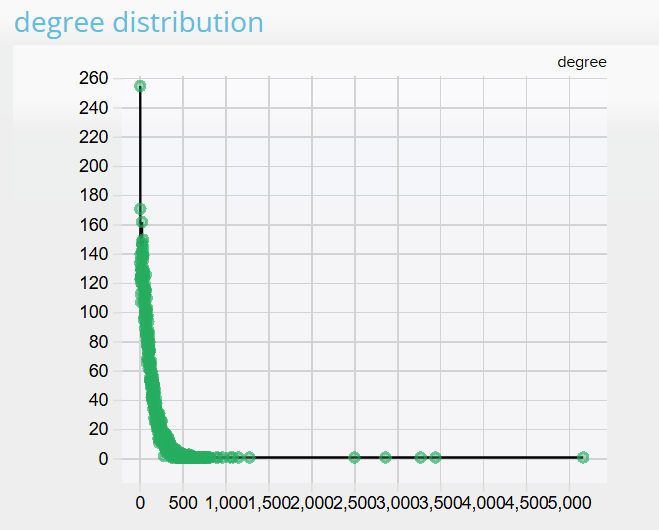

At its page at the Network Data Repository, we can find an interactive graph of the degree distribution of the network. We find that there is indeed high variance and skewness of the distribution, which introduces the  mentioned sampling bias. Additionally, we notice that a clustering of nodes appears around the 10th degree, while there are a few hubs. This complies with our reasoning - not only is the distribution right-skewed, but also the degree-degree correlation coefficient is almost 0.

Source: https://www.cs.cornell.edu/home/kleinber/networks-book/networks-book-ch18.pdf


## **Problem 7.**
*Design a metric that measures how different the degree distribution of a graph is from its corresponding
size-biased degree distribution. Explain why your metric works*

We denote by $P(k)$ the standard degree distribution, i.e. the probability that a randomly chosen node in the network has exactly degree k.
The size-biased degree distribution, which is the probability that a node reached by following a random edge has degree k, is defined as:
$$ Q(k) = \frac{k P(k)}{\langle k \rangle} $$
where $ \langle k \rangle $ represents the average degree of the network.
In order to obtain direct, dimensionless measure of the network heterogeneity we decided the compare the expected values of the two probabilities.
The expectation of $P(k)$ is:
$$ \mathbb{E}_P[k] = \sum_{k} k P(k) = \langle k \rangle $$
while the expectation of $Q(k)$ is:
$$ \mathbb{E}_Q[k] = \sum_{k} k Q(k) = \sum_{k} k \left( \frac{k P(k)}{\langle k \rangle} \right) = \frac{1}{\langle k \rangle} \sum_{k} k^2 P(k) = \frac{\langle k^2 \rangle}{\langle k \rangle} $$
And finally, as our metric we chose to consider the ratio of the two expectations:
$$ \mathcal{M} = \frac{\mathbb{E}_Q[k]}{\mathbb{E}_P[k]} = \frac{\frac{\langle k^2 \rangle}{\langle k \rangle}}{\langle k \rangle} = \frac{\langle k^2 \rangle}{\langle k \rangle^2} $$


If all nodes have the same degree, we will have
$$ k_i = \langle k \rangle \text{ for all } i \quad \text{so} \quad \langle k^2 \rangle = \langle k \rangle^2, \text{ therefore } \mathcal{M}=1. $$
This signifies that the two distributions are identical so the probability of encountering a node with degree k is the same whether you pick the node randomly or follow an edge to it.

However, when $P(k) \ne Q(k)$, it indicates that the network is heterogeneous, meaning some nodes possess degrees significantly larger than others. Due to the preferential sampling mechanism, the size-biased distribution $Q(k)$ is skewed towards higher degrees, which makes the expected degree of a neighbor, $\mathbb{E}_Q[k]$, strictly greater than the expected degree of a random node, $\mathbb{E}_P[k]$. This discrepancy results in a metric value of $\mathcal{M} > 1$. Consequently, the larger the value of $\mathcal{M}$, the more pronounced the heterogeneity of the network, and the greater the measurable difference between the standard degree distribution $P(k)$ and its size-biased counterpart $Q(k)$.

A stenght of this matric is its connection to the variance.
We know that:
$$ \operatorname{Var}(D) = \mathbb{E}[D^2] - (\mathbb{E}[D])^2 = \langle k^2 \rangle - \langle k \rangle^2 $$

We can rewrite $\mathcal{M}$ in terms of variance:
$$ \mathcal{M} = \frac{\langle k^2 \rangle}{\langle k \rangle^2} = \frac{\langle k^2 \rangle - \langle k \rangle^2 + \langle k \rangle^2}{\langle k \rangle^2} = 1 + \frac{\operatorname{Var}(D)}{\langle k \rangle^2} $$

Since $\operatorname{Var}(D) \ge 0$, $\mathcal{M}$ is always $\ge 1$. The metric shows that the difference between the distributions is directly proportional to the variance of the original degree distribution, normalized by the average degree. Higher variance means a greater difference between $P(k)$ and $Q(k)$, hence a higher $\mathcal{M}$.

## **Problem 8.**
*For the ten networks in Problem 5, use your metric in Problem 7 to measure how dissimilar the degree
distribution and size-biased degree distribution of the networks are. Then, plot this value against the severity of the
friendship paradox of each network. To what extent do you feel that the difference between size-biased and “normal”
degree distribution explains the behaviour of your friendship paradox metric?*

In [ ]:
def calculate_heterogeneity_metric(G):
    """
    Calculates the heterogeneity metric M = <k^2> / <k>^2.

    param G: network object
    """
    if not G or G.number_of_nodes() == 0 or G.number_of_edges() == 0:
        return 1.0

    #Analyzing only the largest connected component
    if not nx.is_connected(G):
        try:
            G = G.subgraph(max(nx.connected_components(G), key=len)).copy()
        except ValueError:
            return 1.0


    degrees = np.array([d for n, d in G.degree()])

    if len(degrees) == 0:
        return 1.0


    avg_k = np.mean(degrees)
    avg_k_squared = np.mean(degrees ** 2)

    if avg_k == 0:
        return np.inf


    M_metric = avg_k_squared / (avg_k ** 2)

    return M_metric



network_files_to_process = [
    "BA-2_24_60-L2.edges",
    "bio-WormNet-v3.edges",
    "bn-mouse-kasthuri_graph_v4.edges",
    "soc-hamsterster.edges",
    "bio-dmela.mtx",
    "bio-yeast.mtx",
    "soc-epinions.mtx",
    "socfb-Auburn71.mtx",
    "socfb-Baylor93.mtx",
    "socfb-Harvard1.mtx",
]

results = {}

print(r"--- Calculating Heterogeneity Metric ---")
print("-" * 80)

for filename in network_files_to_process:
    G = read_network_file(filename)

    if G is not None:
        H = calculate_heterogeneity_metric(G)
        results[filename] = H
        print(f"SUCCESS: {filename:<30}: Nodes={G.number_of_nodes():>6}, Edges={G.number_of_edges():>7}, M ={H:7.4f}")
    else:
        results[filename] = "ERROR: Failed to Load Graph"
        print(f"FAILED: {filename:<30}")


--- Calculating Heterogeneity Metric ---
--------------------------------------------------------------------------------
SUCCESS: BA-2_24_60-L2.edges           : Nodes= 10693, Edges= 639750, M =18.4717
SUCCESS: bio-WormNet-v3.edges          : Nodes= 16347, Edges= 762822, M = 3.1750
SUCCESS: bn-mouse-kasthuri_graph_v4.edges: Nodes=  1029, Edges=   1559, M = 5.2356
SUCCESS: soc-hamsterster.edges         : Nodes=  2429, Edges=  16632, M = 2.7195
SUCCESS: bio-dmela.mtx                 : Nodes=  7393, Edges=  25569, M = 3.4294
SUCCESS: bio-yeast.mtx                 : Nodes=  1458, Edges=   1948, M = 2.6673
SUCCESS: soc-epinions.mtx              : Nodes= 26588, Edges= 100120, M = 7.2588
SUCCESS: socfb-Auburn71.mtx            : Nodes= 18448, Edges= 973918, M = 2.1669
SUCCESS: socfb-Baylor93.mtx            : Nodes= 12803, Edges= 679817, M = 1.8735
SUCCESS: socfb-Harvard1.mtx            : Nodes= 15126, Edges= 824617, M = 2.0418


<>:36: SyntaxWarning: invalid escape sequence '\m'
<>:37: SyntaxWarning: invalid escape sequence '\m'
<>:36: SyntaxWarning: invalid escape sequence '\m'
<>:37: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-261865701.py:36: SyntaxWarning: invalid escape sequence '\m'
  ax2.set_ylabel('Heterogeneity Index $\mathcal{M} = \\langle k^2 \\rangle / \\langle k \\rangle^2$', color=color2)
/tmp/ipython-input-261865701.py:37: SyntaxWarning: invalid escape sequence '\m'
  rects2 = ax2.bar(x + width/2, M_values, width, label='Metric $\mathcal{M}$', color=color2, alpha=0.6)


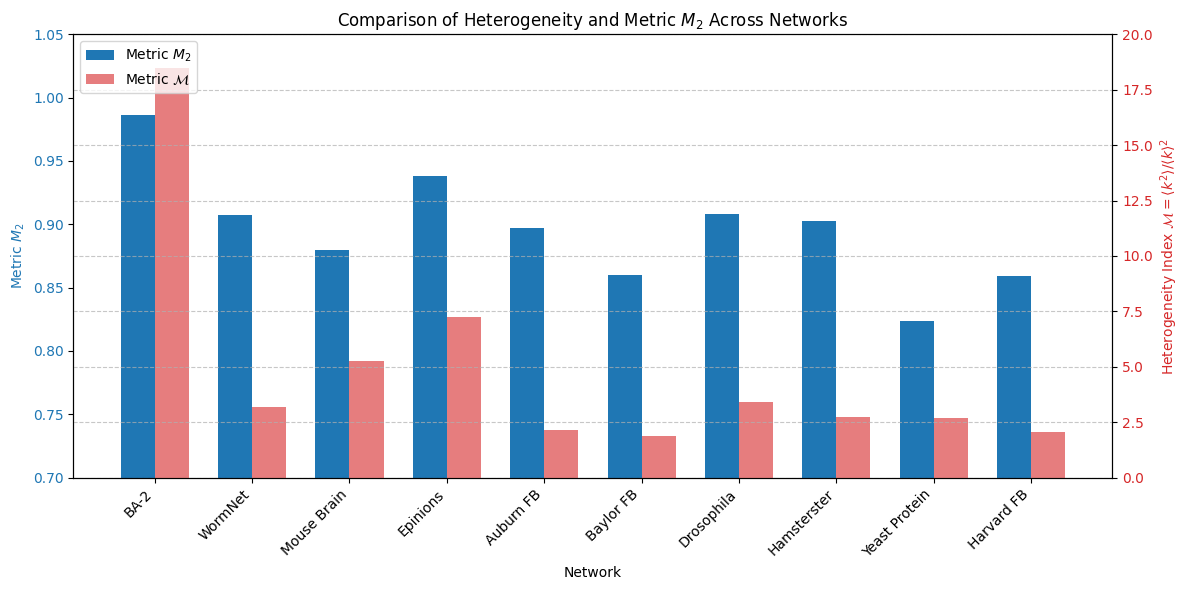

In [ ]:
networks = [
    "BA-2", "WormNet", "Mouse Brain", "Epinions",
    "Auburn FB", "Baylor FB", "Drosophila", "Hamsterster",
    "Yeast Protein", "Harvard FB"
]


M_values = np.array([
    18.47, 3.18, 5.24, 7.26,
    2.17, 1.87, 3.43, 2.72,
    2.67, 2.04
])


M2_values = np.array([
    0.986, 0.907, 0.880, 0.938,
    0.897, 0.860, 0.908, 0.903,
    0.824, 0.859
])

x = np.arange(len(networks))
width = 0.35
fig, ax1 = plt.subplots(figsize=(12, 6))


color1 = 'tab:blue'
ax1.set_xlabel('Network')
ax1.set_ylabel('Metric $M_2$', color=color1)
rects1 = ax1.bar(x - width/2, M2_values, width, label='Metric $M_2$', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim(0.7, 1.05)


ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Heterogeneity Index $\mathcal{M} = \\langle k^2 \\rangle / \\langle k \\rangle^2$', color=color2)
rects2 = ax2.bar(x + width/2, M_values, width, label='Metric $\mathcal{M}$', color=color2, alpha=0.6)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(0, 20)


ax1.set_title('Comparison of Heterogeneity and Metric $M_2$ Across Networks')
ax1.set_xticks(x)
ax1.set_xticklabels(networks, rotation=45, ha="right")
fig.tight_layout()


lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

Taking into account the results presented in this plot, the difference between the size-biased degree distribution ($Q(k)$) and the normal degree distribution ($P(k)$) perfectly explains the behavior of the Heterogeneity Index, which serves as your friendship paradox metric. The metric $\mathcal{M}$ is defined mathematically as the ratio of the two distributions' expected values so this means it directly quantifies the phenomenon that $\mathbb{E}_Q[k]$ is always greater than or equal to $\mathbb{E}_P[k]$. Furthermore, since $\mathcal{M}$ can be written as $1 + \operatorname{Var}(D)/\langle k \rangle^2$, a high $\mathcal{M}$ value is directly proportional to a large degree variance, confirming that the dissimilarity between $Q(k)$ and $P(k)$ is the fundamental cause and measure of the friendship paradox effect.